<font size = 6> Линейная регрессия

Выполнил:
Шавалюк Степан

Цель работы — предсказание стоимости коттеджа по его площади и другим
характеристик с помощью линейной модели регрессионного анализа.

<font size = 4> Описание переменных

In [2986]:

columns = ds.columns.tolist()
print(columns[:14])

['Ссылка-href', 'Польз', 'Наименование', 'Адрес', 'Район', 'цена', 'Общая площадь', 'Этаж', 'Жилая площадь', 'Количество комнат', 'Площадь кухни', 'Высота потолков', 'Этажей в доме', 'цена в тысячах']


Стоимость коттеджа в тысячах долларов США


# Введение

Импортируем нужные нам библиотеки

In [2777]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import math
import scipy

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score, explained_variance_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Загрузим данные

In [2976]:
#df = pd.read_excel("Avito_Oms.xlsx", header=0)
#df = pd.read_csv("info.csv", header=0)
#ds = pd.read_csv("Avito_Oms (3).csv", header=0)
#ds = pd.read_csv("ochist (2).csv", header=0)
ds = pd.read_csv("ochistPoln.csv", header=0)


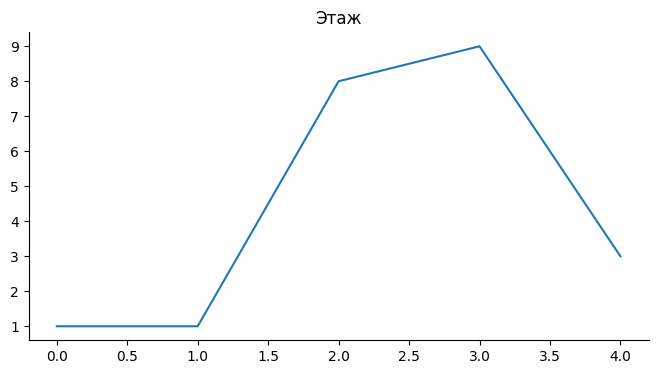

In [2780]:
from matplotlib import pyplot as plt
_df_14['Этаж'].plot(kind='line', figsize=(8, 4), title='Этаж')
plt.gca().spines[['top', 'right']].set_visible(False)

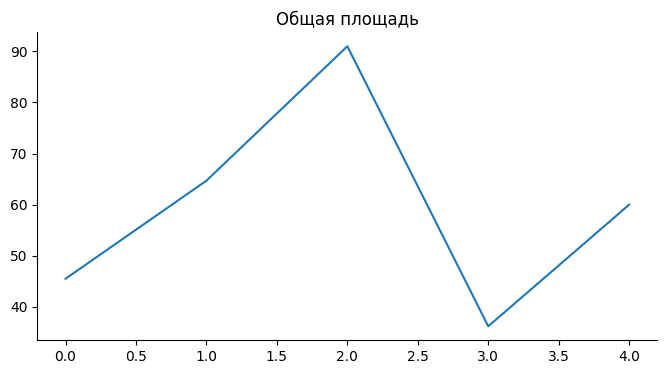

In [2781]:
from matplotlib import pyplot as plt
_df_13['Общая площадь'].plot(kind='line', figsize=(8, 4), title='Общая площадь')
plt.gca().spines[['top', 'right']].set_visible(False)

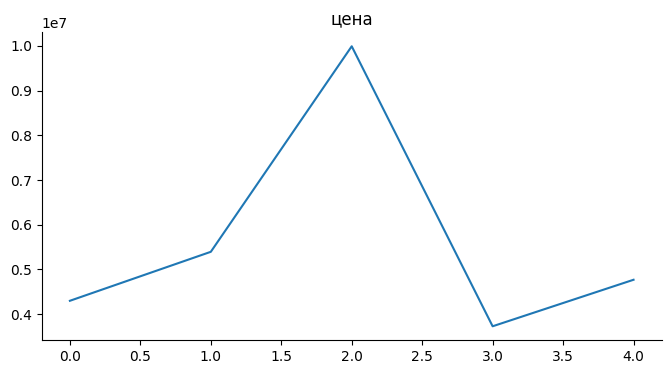

In [2782]:
from matplotlib import pyplot as plt
_df_12['цена'].plot(kind='line', figsize=(8, 4), title='цена')
plt.gca().spines[['top', 'right']].set_visible(False)

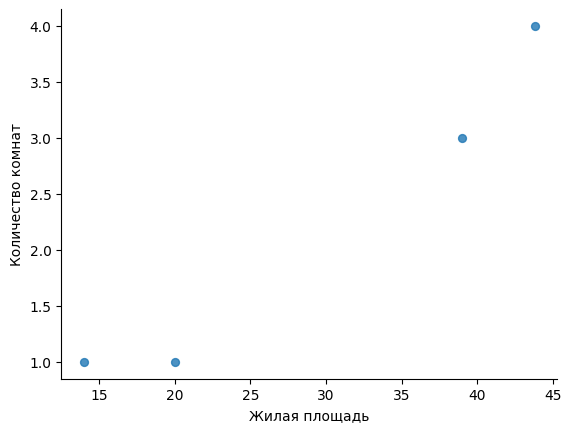

In [2783]:
from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Жилая площадь', y='Количество комнат', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

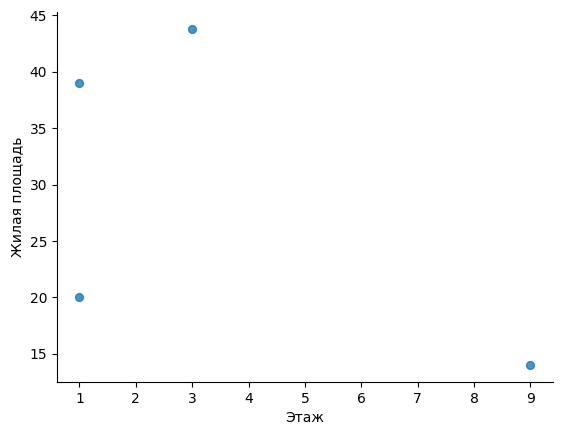

In [2784]:
from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Этаж', y='Жилая площадь', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

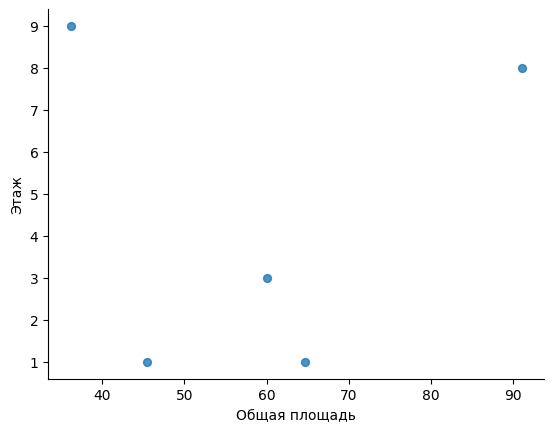

In [2785]:
from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Общая площадь', y='Этаж', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

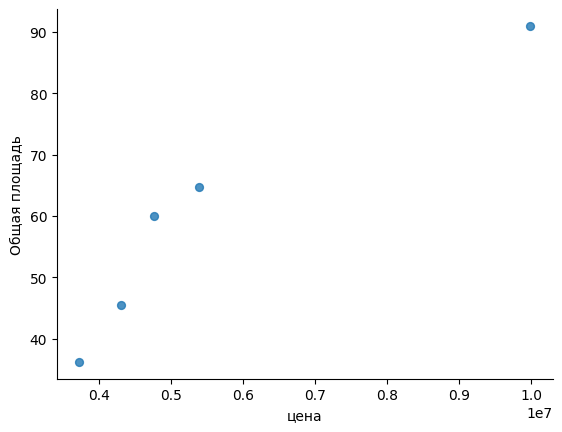

In [2786]:
from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='цена', y='Общая площадь', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

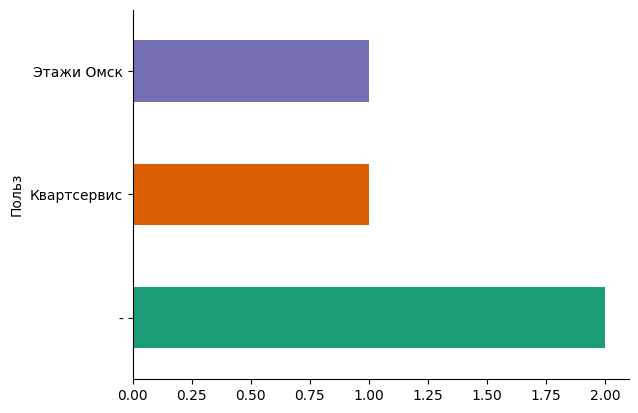

In [2787]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Польз').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Гистограммы переменных

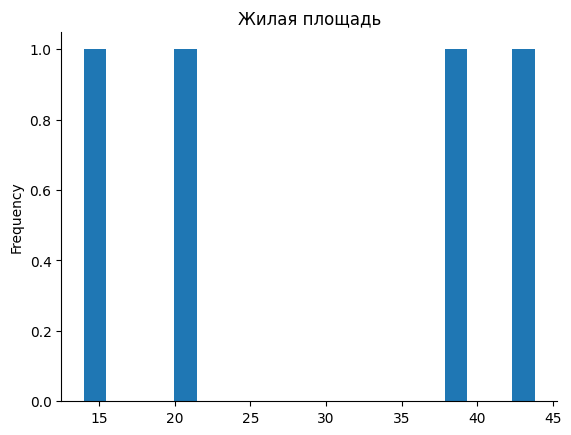

In [2788]:
from matplotlib import pyplot as plt
_df_3['Жилая площадь'].plot(kind='hist', bins=20, title='Жилая площадь')
plt.gca().spines[['top', 'right',]].set_visible(False)

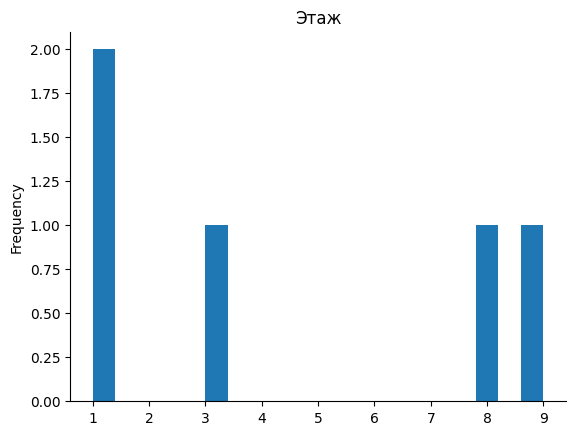

In [2789]:
from matplotlib import pyplot as plt
_df_2['Этаж'].plot(kind='hist', bins=20, title='Этаж')
plt.gca().spines[['top', 'right',]].set_visible(False)

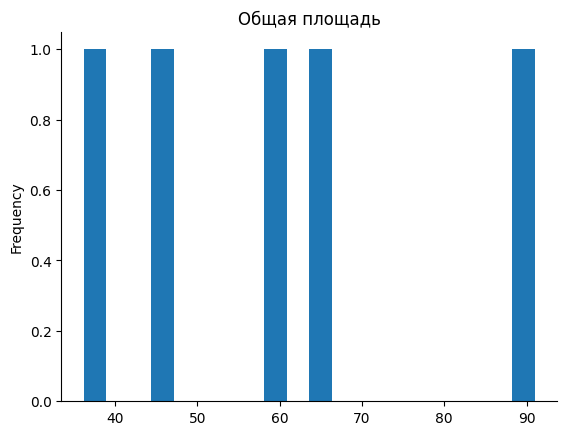

In [2790]:
from matplotlib import pyplot as plt
_df_1['Общая площадь'].plot(kind='hist', bins=20, title='Общая площадь')
plt.gca().spines[['top', 'right',]].set_visible(False)

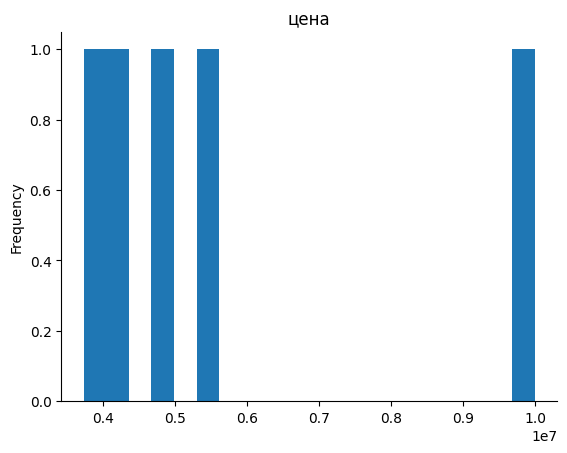

In [2791]:
from matplotlib import pyplot as plt
_df_0['цена'].plot(kind='hist', bins=20, title='цена')
plt.gca().spines[['top', 'right',]].set_visible(False)

Убедимся, что они корректно загрузились

In [2792]:
columns_to_keep = [6,7,8,9,10,12,13]
ds = ds.iloc[:, columns_to_keep]

In [2793]:
ds.head()

,Общая площадь,Этаж,Жилая площадь,Количество комнат,Площадь кухни,Этажей в доме,цена в тысячах
0,45.5,1.0,20.0,1.0,19.0,9,43
1,64.7,1.0,39.0,3.0,9.0,9,53
2,91.0,8.0,NaN,3.0,33.0,9,99
3,36.2,9.0,14.0,1.0,14.0,10,37
4,60.0,3.0,43.8,4.0,5.5,5,47


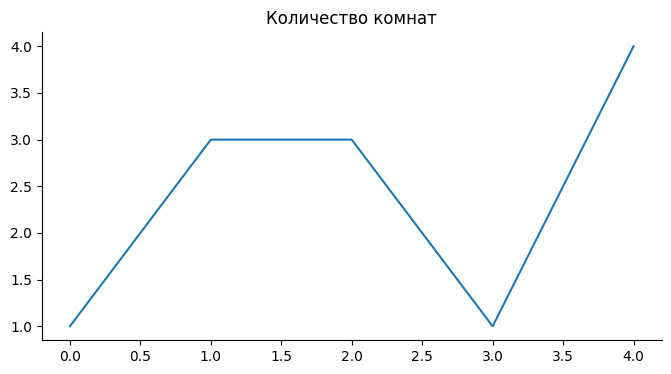

In [2794]:
from matplotlib import pyplot as plt
_df_35['Количество комнат'].plot(kind='line', figsize=(8, 4), title='Количество комнат')
plt.gca().spines[['top', 'right']].set_visible(False)

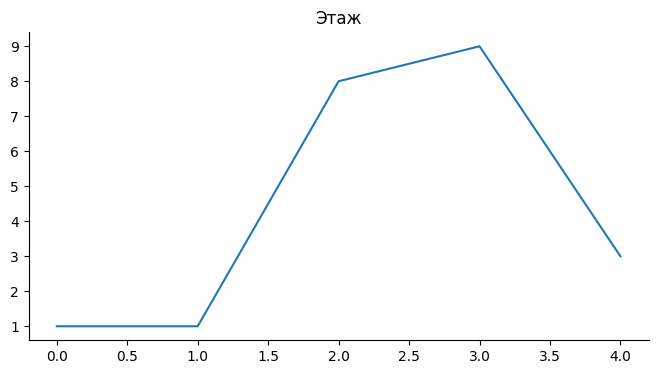

In [2795]:
from matplotlib import pyplot as plt
_df_33['Этаж'].plot(kind='line', figsize=(8, 4), title='Этаж')
plt.gca().spines[['top', 'right']].set_visible(False)

In [2797]:
num_cols = ['Общая площадь',	'Этаж',	'Жилая площадь'	,'Количество комнат',	'Этажей в доме'	]


array([[<Axes: title={'center': 'Общая площадь'}>,
        <Axes: title={'center': 'Этаж'}>],
       [<Axes: title={'center': 'Жилая площадь'}>,
        <Axes: title={'center': 'Количество комнат'}>],
       [<Axes: title={'center': 'Этажей в доме'}>, <Axes: >]],
      dtype=object)

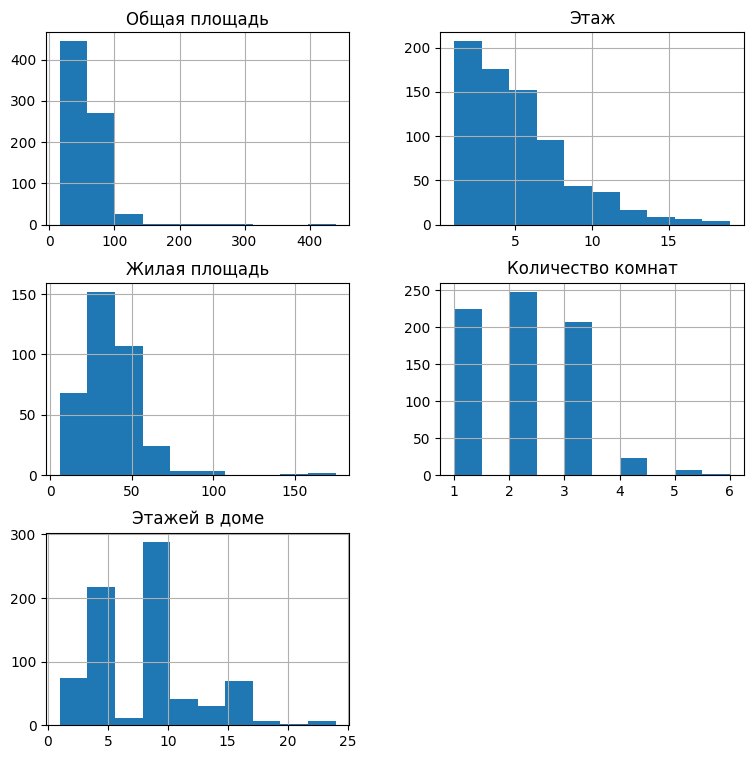

In [2798]:
ds[num_cols].hist(figsize=(9,9))

<Axes: >

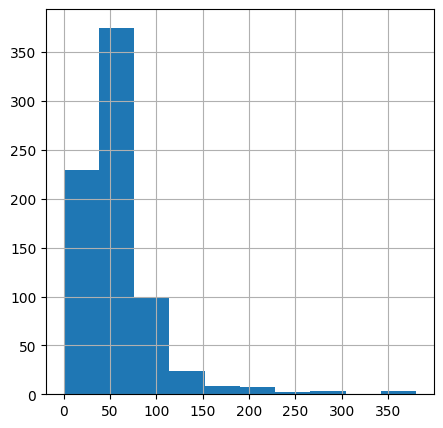

In [2799]:
ds['цена в тысячах'].hist(figsize=(5,5))

<Axes: xlabel='Общая площадь', ylabel='цена в тысячах'>

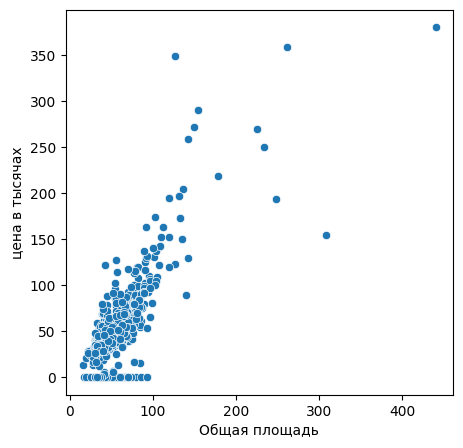

In [2800]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=ds['Общая площадь'], y=ds['цена в тысячах'])

<Axes: xlabel='Жилая площадь', ylabel='цена в тысячах'>

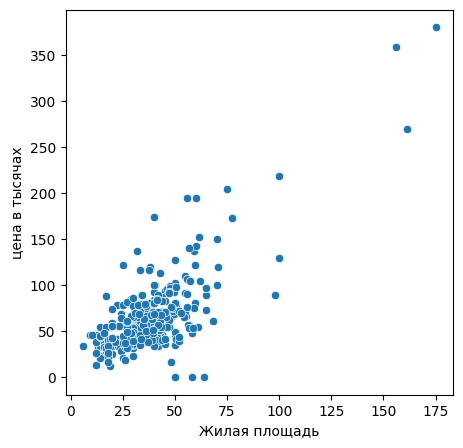

In [2801]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=ds['Жилая площадь'], y=ds['цена в тысячах'])

# Подготовка данных

In [2802]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

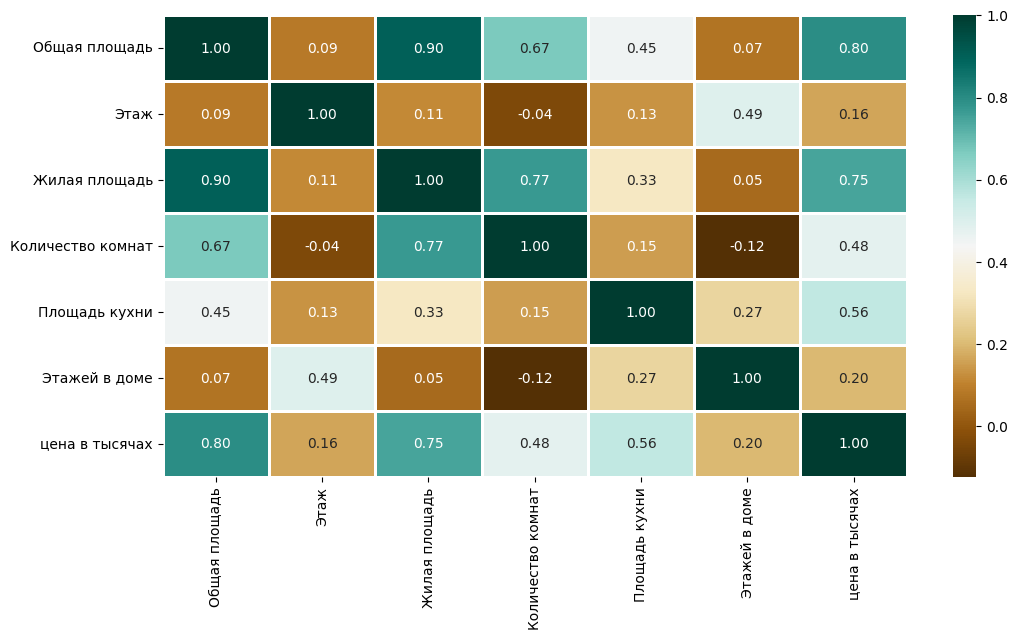

In [2803]:
plt.figure(figsize=(12, 6))
sns.heatmap(ds.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

Уберем NaN-значения

In [2804]:
ds.dropna(inplace=True)

Выделим отдельно целевую переменную и исходные признаки

In [2806]:
y1 = ds['цена в тысячах']
y1

0      43
1      53
3      37
4      47
5      52
       ..
739    26
742    69
743    80
745    42
747    51
Name: цена в тысячах, Length: 360, dtype: int64

Выделим матрицу исходных признаков в переменную X1

In [2807]:
X1 = ds.drop('цена в тысячах', axis = 1)
X1

,Общая площадь,Этаж,Жилая площадь,Количество комнат,Площадь кухни,Этажей в доме
0,45.5,1.0,20.0,1.0,19.0,9
1,64.7,1.0,39.0,3.0,9.0,9
3,36.2,9.0,14.0,1.0,14.0,10
4,60.0,3.0,43.8,4.0,5.5,5
5,58.1,2.0,38.0,3.0,7.0,5
...,...,...,...,...,...,...
739,30.0,2.0,18.0,1.0,6.0,5
742,65.0,3.0,40.0,3.0,10.0,5
743,77.0,3.0,35.5,2.0,18.0,8
745,60.0,3.0,45.0,3.0,6.4,5


Разделим выборку на обучающую и тестовую, отнеся в тестовую часть 20% данных, а в обучающую - остальные 80%.

Используем функцию train_test_split

In [2987]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.8)


#Обучение модели

Введем новый объект - модель линейной регрессии

In [2809]:
model = LinearRegression(fit_intercept=True)

Обучаем модель на наших данных

In [2810]:
ml = model.fit(X1_train, y1_train)

Посмотрим на результат обучения. Оценки коэффициентов перед знаками

In [2811]:
ml.coef_

array([ 0.80550861,  0.75301562,  0.41790119, -4.30942308,  0.52513127,
        1.79857617])

Оценка свободного коэффициента

In [2812]:
ml.intercept_

-15.438049276138344

#Тестирование и оценка качества

##Оценка качества модели на обучающей выборке

Выполним предсказание значений целевой функции моделью с помощью метода predict

In [2813]:
y1_pred = ml.predict(X1_train)
y1_pred

array([ 55.83309812,  41.13381701,  47.79928904,  38.45197523,
        65.23561006,  91.07457834, 101.49943716,  64.33364581,
        40.75560104,  25.58970719,  10.45767   ,  33.61357754,
       134.03064587, 102.20604277,  32.16796013,  42.04768473,
        51.49770218,  52.17888862,  31.65876589,  55.3847709 ,
       122.24590148,  71.12527288,  57.21102941,  80.02553995,
        68.91333733,  26.42550957,  55.67918821,  61.78093127,
        34.02734584, 239.84585953,  54.04307409,  46.31838603,
        45.36750439,  34.25719952,  34.34571274, 151.19698547,
        29.53623894,  34.91921119,  62.93262816,  56.55575062,
        67.54625107,  46.99724609,  60.27452662,  71.44398565,
        73.1875536 ,  54.95146621,  43.37228599,  84.57258523,
        66.23806312, 435.05056784,  83.60698032,  47.37729613,
        58.73903962,  62.97271216,  72.63850175,  53.38251974,
        34.49390348,  27.30795449,  26.4477088 , 103.73244183,
        59.79972067,  51.49116623,  33.47523596,  82.21

Вычислим остатки - разности между имеющимися значениями и предсказанными значениями целевой переменной

In [2814]:
e_ml = y1_train - y1_pred
e_ml

665   -14.833098
78      7.866183
436   -10.799289
290    12.548025
477    11.764390
         ...    
596     3.196249
261     1.965661
451    -0.339006
325    -0.546636
546   -10.888480
Name: цена в тысячах, Length: 288, dtype: float64

Построим диаграмму остатков

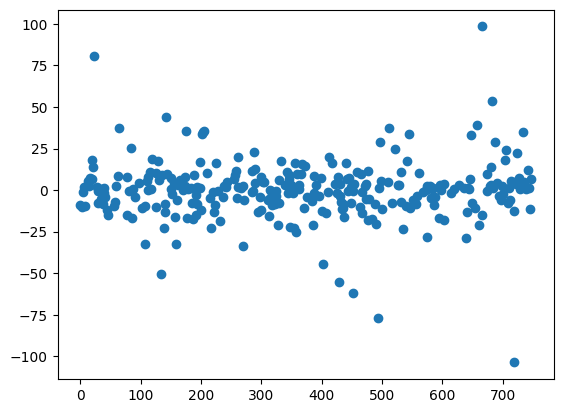

In [2815]:
plt.scatter(e_ml.index, e_ml)

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [2816]:
R2_ml = metrics.explained_variance_score(y1_train, y1_pred)
R2_ml

0.8021264755510387

Это является очень хорошим результатом и говорит о том, что ваша модель хорошо соответствует данным и способна объяснить большую часть изменчивости в зависимой переменной.

Высокое значение свидетельствует о том, что ваша модель хорошо подходит для прогнозирования зависимой переменной на основе предоставленных данных.

Вычислим метрику MAPE с помощью функции mean_absolute_percentage_error

In [2817]:
mape_ml = metrics.mean_absolute_percentage_error(y1_train, y1_pred) * 100
mape_ml

3.78785927310364e+17

Небольшая величина метрики (меньше, чем 15)  говорит о высоком качестве модели на обучающей выборке

Вычислим дополнительные характеристики - метрики MSE и MAE. Они потребуются для сравнения качества модели на обучающей и тестовой выборках.


Метрика MSE:

In [2818]:
mse_ml = metrics.mean_squared_error(y1_train, y1_pred)
mse_ml

328.44479871345516

Метрика MAE:

In [2819]:
mae_ml = metrics.mean_absolute_error(y1_train, y1_pred)
mae_ml

11.420529720306007

##Оценка качества модели на тестовой выборке

Выполним предсказание значений целевой функции моделью с помощью метода predict

In [2820]:
y1_test_pred = ml.predict(X1_test)
y1_test_pred

array([ 15.54924384,  61.71461781,  29.34049564, 129.4990152 ,
        59.33876467,  46.27398835,  76.13107854,  50.00349378,
        29.94102356,  97.81001838,  40.63677446,  18.58296145,
        88.37786137,  82.9873847 ,  26.81886303,  50.24715889,
        78.85797075,  91.85787728,  54.18254283,  81.02239651,
        91.01996317,  87.79803837,  71.52275994,  31.70688758,
       190.47961817,  40.45561711,  70.84977472, 100.96769931,
        28.25371217, 113.28089374,  47.17079002,  33.61357754,
        63.82075237,  93.44748875,  71.70280327,  62.67310402,
        66.58906756,  28.0365268 ,  46.79638283,  38.00304291,
        51.10844136,  51.86145697,  87.63164773,  48.48880818,
        23.5557408 ,  53.67660115,  60.07141999,  37.09976596,
        72.80118179,  54.27461566,  45.51381088, 155.28310884,
        75.03038893,  62.31204363,  38.66833098,  47.1211668 ,
        50.23034409,  75.99461863,  92.6108929 ,  69.32507905,
        42.48666011,  82.00598095,  45.66696349,  87.78

Вычислим остатки - разности между имеющимися значениями и предсказанными значениями целевой переменной

In [2821]:
e_test_ml = y1_test - y1_test_pred
e_test_ml

738    10.450756
1      -8.714618
166    -0.340496
256    74.500985
144    -3.338765
         ...    
392   -17.145921
248    -5.418344
686   -10.882337
416   -19.409995
337     0.955142
Name: цена в тысячах, Length: 72, dtype: float64

Построим диаграмму остатков

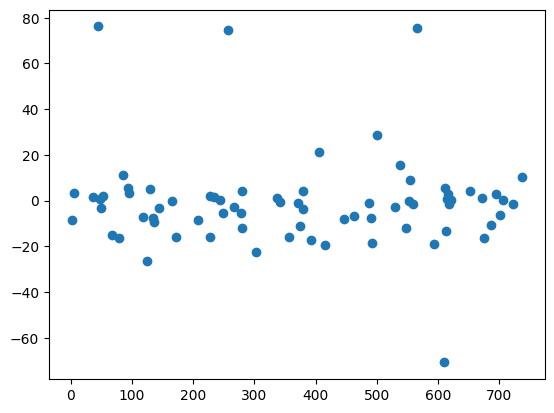

In [2822]:
plt.scatter(e_test_ml.index, e_test_ml)

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [2823]:
R2_test_ml = metrics.explained_variance_score(y1_test, y1_test_pred)
R2_test_ml

0.7251609075360023

Вычислим метрику MAPE с помощью функции mean_absolute_percentage_error

In [2824]:
mape_test_ml = metrics.mean_absolute_percentage_error(y1_test, y1_test_pred) * 100
mape_test_ml

4.431653042345401e+17

Вычислим дополнительные характеристики - метрики MSE и MAE. Они потребуются для сравнения качества модели на обучающей и тестовой выборках.

Метрика MSE:

In [2825]:
mse_test_ml = metrics.mean_squared_error(y1_test, y1_test_pred)
mse_test_ml

411.1667920314942

In [2826]:
mae_test_ml = metrics.mean_absolute_error(y1_test, y1_test_pred)
mae_test_ml

11.49068890751696

Составим таблицу из значений найденных метрик на обучающей и тестовой выборках

In [2827]:
ind = ['R', 'MAPE', 'MSE', 'MAE']
dat1 = [R2_ml, mape_ml, mse_ml, mae_ml]
dat2 = [R2_test_ml, mape_test_ml, mse_test_ml, mae_test_ml]

pd.DataFrame({
    'Metrics': ['R', 'MAPE', 'MSE', 'MAE'],
    'Train': [R2_ml, mape_ml, mse_ml, mae_ml],
    'Test': [R2_test_ml, mape_test_ml, mse_test_ml, mae_test_ml]
})

,Metrics,Train,Test
0,R,8.021265e-01,7.251609e-01
1,MAPE,3.787859e+17,4.431653e+17
2,MSE,3.284448e+02,4.111668e+02
3,MAE,1.142053e+01,1.149069e+01


Мы видим, что значения метрик получались лучше на обучающей выборке, чем на тестовой.

In [2828]:
# Подготовьте входные данные для предсказания [ Общая площадь	Этаж	Жилая площадь	Количество комнат	Площадь кухни	Этажей в доме	цена в тысячах]
#features = [[100,1,20,2,20,5]]  # Замените признаки на реальные значения

# Используйте модель для предсказания цены
#predicted_price = model.predict(features)

##print("Предсказанная цена недвижимости:", predicted_price)


#Улучшение качества модели

##Очистка данных

Построим диаграмму рассеяния, расположив выборочные значения стоимости коттеджа по горизонтальной оси

Text(0.5, 0, 'Выборочные значения')

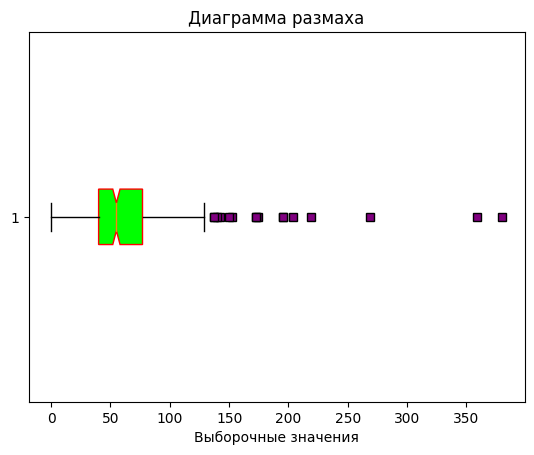

In [2829]:
box = plt.boxplot(ds['цена в тысячах'], vert = False, notch = True, patch_artist = True,
                  flierprops = dict(markerfacecolor = 'purple', marker = 's'),
                  boxprops = dict(color = 'red', facecolor = 'lime' ))
plt.title("Диаграмма размаха")
plt.xlabel("Выборочные значения")

В выборке, по-видимому, присутствуют аномальные данные. Генеральная совокупность симметрична (усы одиннаковой длины).

Выберем данные с помощью условия Price < 150

In [2830]:
ds2 = ds[ds['цена в тысячах'] < 125]
ds2

,Общая площадь,Этаж,Жилая площадь,Количество комнат,Площадь кухни,Этажей в доме,цена в тысячах
0,45.5,1.0,20.0,1.0,19.0,9,43
1,64.7,1.0,39.0,3.0,9.0,9,53
3,36.2,9.0,14.0,1.0,14.0,10,37
4,60.0,3.0,43.8,4.0,5.5,5,47
5,58.1,2.0,38.0,3.0,7.0,5,52
...,...,...,...,...,...,...,...
739,30.0,2.0,18.0,1.0,6.0,5,26
742,65.0,3.0,40.0,3.0,10.0,5,69
743,77.0,3.0,35.5,2.0,18.0,8,80
745,60.0,3.0,45.0,3.0,6.4,5,42


После выборки данных с помощью условия Price < 150, были убраны аномальные данные

In [2831]:
dif = len(ds) - len(ds2)
dif

18

Выделим целевую переменную в переменную y2

In [2832]:
y2 = ds2['цена в тысячах']
y2

0      43
1      53
3      37
4      47
5      52
       ..
739    26
742    69
743    80
745    42
747    51
Name: цена в тысячах, Length: 342, dtype: int64

Выделим матрицу исходных признаков в переменную X2

In [2833]:
X2 = ds2.drop('цена в тысячах', axis = 1)
X2

,Общая площадь,Этаж,Жилая площадь,Количество комнат,Площадь кухни,Этажей в доме
0,45.5,1.0,20.0,1.0,19.0,9
1,64.7,1.0,39.0,3.0,9.0,9
3,36.2,9.0,14.0,1.0,14.0,10
4,60.0,3.0,43.8,4.0,5.5,5
5,58.1,2.0,38.0,3.0,7.0,5
...,...,...,...,...,...,...
739,30.0,2.0,18.0,1.0,6.0,5
742,65.0,3.0,40.0,3.0,10.0,5
743,77.0,3.0,35.5,2.0,18.0,8
745,60.0,3.0,45.0,3.0,6.4,5


Обучим модель с помощью выборки, не разделяя ее на обучающую и тестовую части

In [2834]:
ml2 = model.fit(X2, y2)

Найдем предсказанные моделью значения зависимой переменной

In [2835]:
y2_pred = ml2.predict(X2)

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [2836]:
R2test_m2 = metrics.explained_variance_score(y2, y2_pred)
R2test_m2

0.6201094458877734

Попробуем отобрать данные, убирая в таблице ds2 строку, у которой в модели m2 самый большой остаток

In [2837]:
e_ml2 = y2 - y2_pred
e_ml2

0     -10.606281
1      -8.175031
3     -12.376420
4       0.390128
5       3.896250
         ...    
739    -3.414992
742    13.588763
743     2.952480
745    -6.752743
747     8.928980
Name: цена в тысячах, Length: 342, dtype: float64

In [2838]:
sorted_e_ml2 = e_ml2.sort_values(ascending=False)
sorted_e_ml2

565    77.018898
288    42.973444
647    39.120119
204    37.701319
496    34.684904
         ...    
402   -42.265758
452   -45.995204
609   -54.381974
493   -68.728135
718   -89.931414
Name: цена в тысячах, Length: 342, dtype: float64

Удалим в исходной матрице данных строки с достаточно большими значениями

In [2839]:
ds3 = ds2.drop(labels = [565], axis = 0)


Выделим целевую переменную Price в переменную y3

In [2840]:
y3 = ds3['цена в тысячах']
y3

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


0      43
1      53
3      37
4      47
5      52
       ..
739    26
742    69
743    80
745    42
747    51
Name: цена в тысячах, Length: 341, dtype: int64

Выделим матрицу исходных признаков в переменную X3

In [2841]:
X3 = ds3.drop('цена в тысячах', axis=1)
X3

,Общая площадь,Этаж,Жилая площадь,Количество комнат,Площадь кухни,Этажей в доме
0,45.5,1.0,20.0,1.0,19.0,9
1,64.7,1.0,39.0,3.0,9.0,9
3,36.2,9.0,14.0,1.0,14.0,10
4,60.0,3.0,43.8,4.0,5.5,5
5,58.1,2.0,38.0,3.0,7.0,5
...,...,...,...,...,...,...
739,30.0,2.0,18.0,1.0,6.0,5
742,65.0,3.0,40.0,3.0,10.0,5
743,77.0,3.0,35.5,2.0,18.0,8
745,60.0,3.0,45.0,3.0,6.4,5


Обучим модель с помощью выборки, не разделяя ее на обучающую и тестовую части

In [2842]:
m3 = model.fit(X3, y3)

Найдем предсказанные моделью значения зависимой переменной

In [2843]:
y3_pred = m3.predict(X3)

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [2844]:
R2test_m3 = metrics.explained_variance_score(y3, y3_pred)
R2test_m3

0.6451229345526608

In [2845]:
e_m3 = y3 - y3_pred
e_m3

0      -9.406219
1      -8.423142
3     -11.648942
4      -0.272095
5       3.705626
         ...    
739    -2.656535
742    13.478864
743     3.332239
745    -6.673900
747     8.835810
Name: цена в тысячах, Length: 341, dtype: float64

In [2846]:
sorted_e_ml3 = e_m3.sort_values(ascending=False)
sorted_e_ml3

288    43.773466
647    39.243257
204    37.451987
496    34.874010
64     33.988767
         ...    
402   -42.890646
452   -45.022002
609   -53.227037
493   -67.980097
718   -89.418847
Name: цена в тысячах, Length: 341, dtype: float64

In [2847]:
ds4 = ds3.drop(labels = [288], axis = 0)


Выделим целевую переменную Price в переменную y4

In [2848]:
y4 = ds4['цена в тысячах']
y4

0      43
1      53
3      37
4      47
5      52
       ..
739    26
742    69
743    80
745    42
747    51
Name: цена в тысячах, Length: 340, dtype: int64

Выделим матрицу исходных признаков в переменную X4

In [2849]:
X4 = ds4.drop('цена в тысячах', axis=1)

Обучим модель с помощью выборки, не разделяя ее на обучаую и тестовую части

In [2850]:
m4 = model.fit(X4, y4)

Найдем предсказанные моделью значения зависимой переменной

In [2851]:
y4_pred = m4.predict(X4)

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [2852]:
R2test_m4 = metrics.explained_variance_score(y4, y4_pred)
R2test_m4

0.6487375735564926

In [2853]:
e_m4 = y4 - y4_pred
e_m4

0      -9.329438
1      -8.449638
3     -11.754334
4      -0.269028
5       3.607719
         ...    
739    -2.697010
742    13.356622
743     2.950375
745    -6.100215
747     8.690083
Name: цена в тысячах, Length: 340, dtype: float64

In [2854]:
sorted_e_m4 = e_m4.sort_values(ascending=False)
sorted_e_m4

647    39.706265
204    37.408501
496    35.118023
175    33.683006
64     33.454754
         ...    
402   -43.315037
452   -43.351687
609   -51.426956
493   -67.775527
718   -87.790874
Name: цена в тысячах, Length: 340, dtype: float64

In [2855]:
ds5 = ds4.drop(labels = [647], axis = 0)

In [2856]:
y5 = ds5['цена в тысячах']

In [2857]:
X5 = ds5.drop('цена в тысячах', axis=1)

In [2858]:
m5 = model.fit(X5, y5)

In [2859]:
y5_pred = m5.predict(X5)

In [2860]:
R2test_m5 = metrics.explained_variance_score(y5, y5_pred)
R2test_m5

0.6545573826742292

In [2861]:
e_m5 = y5 - y5_pred
e_m5

0      -9.339256
1      -8.259481
3     -12.060169
4      -0.080721
5       3.837687
         ...    
739    -2.609976
742    13.586485
743     3.144617
745    -5.798263
747     8.948217
Name: цена в тысячах, Length: 339, dtype: float64

In [2862]:
sorted_e_m5 = e_m5.sort_values(ascending=False)
sorted_e_m5

204    37.599420
496    35.415728
175    33.834347
64     33.118826
84     26.735068
         ...    
402   -42.971549
452   -43.205428
609   -50.951512
493   -67.175716
718   -87.313576
Name: цена в тысячах, Length: 339, dtype: float64

In [2863]:
ds6 = ds5.drop(labels = [204], axis = 0)

In [2864]:
y6 = ds6['цена в тысячах']

In [2865]:
X6 = ds6.drop('цена в тысячах', axis=1)

In [2866]:
m6 = model.fit(X6, y6)

In [2867]:
y6_pred = m6.predict(X6)

In [2868]:
R2test_m6 = metrics.explained_variance_score(y6, y6_pred)
R2test_m6

0.6564987526779982

In [2869]:
e_m7 = y6 - y6_pred
e_m7

0      -9.300695
1      -7.870181
3     -12.226420
4       0.119336
5       4.039428
         ...    
739    -2.657777
742    13.770808
743     3.446140
745    -5.714969
747     8.916400
Name: цена в тысячах, Length: 338, dtype: float64

In [2870]:
sorted_e_m7 = e_m7.sort_values(ascending=False)
sorted_e_m7

496    35.295230
175    33.610090
64     33.100813
84     26.647309
333    25.855135
         ...    
402   -42.664102
452   -43.989534
609   -51.428053
493   -67.088086
718   -86.961784
Name: цена в тысячах, Length: 338, dtype: float64

In [2871]:
ds7 = ds6.drop(labels = [496,175,64,84,333], axis = 0)

In [2872]:
y7 = ds7['цена в тысячах']

In [2873]:
X7 = ds7.drop('цена в тысячах', axis=1)

In [2874]:
m7 = model.fit(X7, y7)

In [2875]:
y7_pred = m7.predict(X7)

In [2876]:
R2test_m7 = metrics.explained_variance_score(y7, y7_pred)
R2test_m7

0.6746439737208754

##Обучение модели

Разделим выборку на обучающую и тестовую, отнеся в тестовую часть 20% данных, а в обучающую - остальные 80%.

Используем функцию train_test_split

In [2877]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, train_size = 0.8)


Введем новый объект - модель линейной регрессии

In [2878]:
model_cleared_data = LinearRegression(fit_intercept=True)

Обучаем модель на наших данных

In [2879]:
ml_cleared = model_cleared_data.fit(X7_train, y7_train)

In [2880]:
ml_cleared.coef_

array([ 1.04121236,  0.07359757, -0.45722871,  0.17849367, -0.14129277,
        1.99299593])

In [2881]:
ml_cleared.intercept_

-4.151429655211416

##Тестирование и оценка качества

###Оценка качества модели на обучающей выборке

Выполним предсказание значений целевой функции моделью
с помощью метода predict

In [2882]:
y7_pred_ = ml_cleared.predict(X7_train)
y7_pred_

array([ 34.75865757,  57.20755037,  94.68293543,  89.91096198,
        59.32486343,  71.80102657,  48.61942736,  75.6829534 ,
        56.10586907,  63.02599998,  38.93814464,  50.34088964,
        29.1103376 ,  65.62463842,  71.47238118,  57.88027799,
        64.55842433,  65.76496833,  58.70917902,  85.52286802,
        41.60455302,  84.54534255,  35.52196298,  45.5620436 ,
        47.67604056,  35.00888238,  68.01348284,  38.70830132,
        27.2095256 ,  47.34355054,  79.61157469,  25.18805861,
        44.9677954 ,  48.64246017,  72.38629505,  36.09631354,
        30.45828882,  24.69537558,  75.26359273,  65.34121921,
        43.17659167,  30.34707947,  22.12385377,  35.66885043,
        51.5372088 ,  57.65342883,  54.54655119,  52.07808025,
        44.24338483,  67.13183041,  49.72476886,  34.34192488,
        41.31537217,  45.23785935,  36.61297298,  75.15438345,
        48.52175439,  79.88641676,  60.97283883,  62.41151928,
        49.01274208,  69.0304612 ,  55.70472586,  18.88

In [2883]:
e_cleared_ml = y7_train - y7_pred_
e_cleared_ml

387    -0.758658
676    -4.207550
27      7.317065
574   -24.910962
117    -0.324863
         ...    
77    -11.196808
210     9.068896
152    -2.628111
374   -12.004483
718   -86.039211
Name: цена в тысячах, Length: 266, dtype: float64

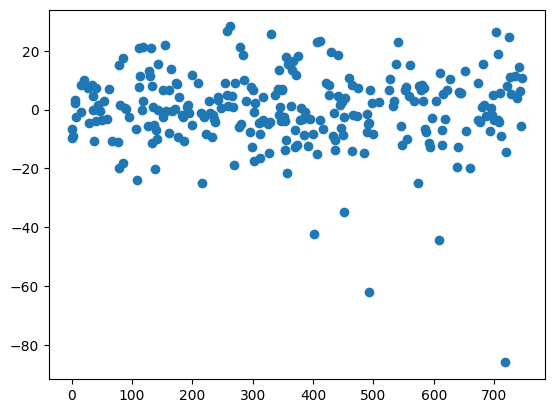

In [2884]:
plt.scatter(e_cleared_ml.index, e_cleared_ml)

In [2885]:
R2_cleared_ml = metrics.explained_variance_score(y7_train, y7_pred_)


Вычислим метрику MAPE с помощью функции mean_absolute_percentage_error

In [2886]:
mape_cleared_ml = metrics.mean_absolute_percentage_error(y7_train, y7_pred_) * 100
mape_cleared_ml

3.8498562316634765e+17

Вычислим дополнительные характеристики - метрики MSE и MAE. Они потребуются для сравнения качества модели на обучающей и тестовой выборках.

Метрика MSE:

In [2887]:
mse_cleared_ml = metrics.mean_squared_error(y7_train, y7_pred_)
mse_cleared_ml

167.57883512114168

Метрика MAE:

In [2888]:
mae_cleared_ml = metrics.mean_absolute_error(y7_train, y7_pred_)
mae_cleared_ml

9.094587703739954

###Оценка качества модели на тестовой выборке

In [2889]:
y7_test_pred = ml_cleared.predict(X7_test)
y7_test_pred

array([ 50.19276533,  34.81916718,  58.13220322,  74.08677783,
        50.25038792,  37.33951192,  81.48242105,  86.39741832,
        71.30864201,  32.00047614,  55.63439487,  30.69609697,
        35.58596151,  49.90313974,  60.87558987,  43.63224946,
        62.13106113,  71.43621126,  40.54700376,  37.46130765,
        58.02335256,  45.15668517,  65.00578354,  46.71890446,
        28.37133386,  32.93905366,  80.03361189,  36.88068374,
        58.53025335,  32.31543172,  73.52289149, 102.18201633,
        38.82846357,  29.25750223,  45.52529612,  28.29773629,
        54.03487929,  41.62007162,  51.71571973,  78.95665708,
        63.89230941,  28.36374607,  38.33035445,  66.22410387,
        34.92033571,  27.24607528,  47.12086651,  60.04773259,
        69.66260698,  39.58783589,  87.27214906,  48.41733137,
        36.93508322,  33.70221504,  45.90226641,  30.30656345,
        63.96273579,  71.1505873 ,  86.45316772,  48.74032576,
        38.07238597,  62.34762564,  46.45724603, 103.99

In [2890]:
e_cleared_test_ml = y7_test - y7_test_pred
e_cleared_test_ml

388     9.807235
432   -10.819167
531    13.867797
171     7.913222
516    -9.250388
         ...    
529    -2.457246
60     12.001870
714    11.519915
540    -8.529598
679     6.749777
Name: цена в тысячах, Length: 67, dtype: float64

Построим диаграмму остатков

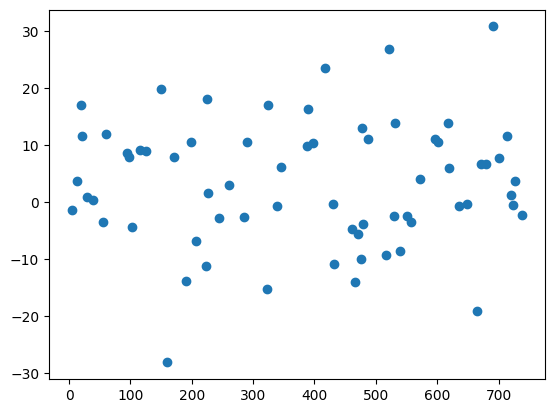

In [2891]:
plt.scatter(e_cleared_test_ml.index, e_cleared_test_ml)

In [2892]:
R2_cleared_test_ml = metrics.explained_variance_score(y7_test, y7_test_pred)


Вычислим метрику MAPE с помощью функции mean_absolute_percentage_error

In [2893]:
mape_cleared_test_ml = metrics.mean_absolute_percentage_error(y7_test, y7_test_pred) * 100
mape_cleared_test_ml

18.414069862771154

Вычислим дополнительные характеристики - метрики MSE и MAE. Они потребуются для сравнения качества модели на обучающей и тестовой выборках.

Метрика MSE:

In [2894]:
mse_cleared_test_ml = metrics.mean_squared_error(y7_test, y7_test_pred)
mse_cleared_test_ml

128.77131142276963

In [2895]:
mae_cleared_test_ml = metrics.mean_absolute_error(y7_test, y7_test_pred)
mae_cleared_test_ml

8.984814585415016

In [2896]:
ind = ['R2', 'MAPE', 'MSE', 'MAE']
dat1 = [R2_cleared_ml, mape_cleared_ml, mse_cleared_ml, mae_cleared_ml]
dat2 = [R2_cleared_test_ml, mape_cleared_test_ml, mse_cleared_test_ml, mae_cleared_test_ml]

pd.DataFrame({
    'Metrics': ['R2', 'MAPE', 'MSE', 'MAE'],
    'Train': [R2_cleared_ml, mape_cleared_ml, mse_cleared_ml, mae_cleared_ml],
    'Test': [R2_cleared_test_ml, mape_cleared_test_ml, mse_cleared_test_ml, mae_cleared_test_ml]
})

,Metrics,Train,Test
0,R2,6.377737e-01,0.792625
1,MAPE,3.849856e+17,18.414070
2,MSE,1.675788e+02,128.771311
3,MAE,9.094588e+00,8.984815


R2  стал лучше на тестовой выборке,  MAPE стал лучше на тестовой выборке, а MSE, MAE хуже на обучающей выборке.

#Заключение

Целью нашей работы было: предсказать стоимость коттеджа по его признакам. Мы провели тестирование и оценку качества модели на обучающей и тестовой выборках используя модель линейной регрессии, пользуясь библиотеками pandas, matplotlib.pyplot, numpy и stats и необходимыми нам инструментами пакета Scikit-learn.
Также мы провели дополнительную очистку данных и ее переобучение.
Проведя повторную оценку и тестирование модели, мы не можем сделать вывод, что данная модель получилась переобученной или недообученой, так как она показывает половину хороших результатов на тестовой выборке и половину хороших на обучающей выборке.

#Пример работы с другими параметрами

In [2971]:
#df = pd.read_csv("info.csv", header=0)
#ds = pd.read_csv("Avito_Oms (3).csv", header=0)
df = pd.read_csv("avito-nedvizh-spb_20.10.23.csv", header=0)


In [2972]:
columns_to_keep = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18]
df = df.iloc[:, columns_to_keep]
df.head()

,ЦЕНА,КОМНАТ,ЖИЛАЯ,ЭТАЖ,ВСЕГО ЭТАЖЕЙ,БАЛКОН,ВЫСОТА,САНУЗЕЛ,ОКНА,РЕМОНТ,МЕБЕЛЬ,ПРОДАЖА,ТИП СДЕЛКИ,ТИП ДОМА,ГОД ПОСТРОЙКИ,ТИП ДОМА кирпичный,Санузел раздельный,Наличие балкона
0,5157000,NaN,NaN,6,6,NaN,NaN,раздельный,во двор,требует ремонта,NaN,свободная,возможна ипотека,кирпичный,1909.0,1,1,0
1,5500000,1.0,15.0,6,9,NaN,NaN,раздельный,во двор,евро,NaN,свободная,NaN,панельный,NaN,0,1,0
2,7500000,2.0,29.0,5,9,балкон,2.5 м,раздельный,"во двор, на солнечную сторону",требует ремонта,"кухня, хранение одежды, спальные места",свободная,возможна ипотека,кирпичный,1984.0,1,1,1
3,6500000,1.0,17.0,8,12,лоджия,2.6 м,раздельный,во двор,дизайнерский,NaN,свободная,возможна ипотека,панельный,1977.0,0,1,0
4,6000000,1.0,17.0,2,9,NaN,2.6 м,раздельный,во двор,косметический,"кухня, хранение одежды",свободная,возможна ипотека,панельный,1973.0,0,1,0


In [2973]:
print(df.columns.tolist ())

['ЦЕНА', 'КОМНАТ', 'ЖИЛАЯ', 'ЭТАЖ', 'ВСЕГО ЭТАЖЕЙ', 'БАЛКОН', 'ВЫСОТА', 'САНУЗЕЛ', 'ОКНА', 'РЕМОНТ', 'МЕБЕЛЬ', 'ПРОДАЖА', 'ТИП СДЕЛКИ', 'ТИП ДОМА', 'ГОД ПОСТРОЙКИ', 'ТИП ДОМА кирпичный', 'Санузел раздельный', 'Наличие балкона ']


<ipython-input-2974-8b69fd96db0b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

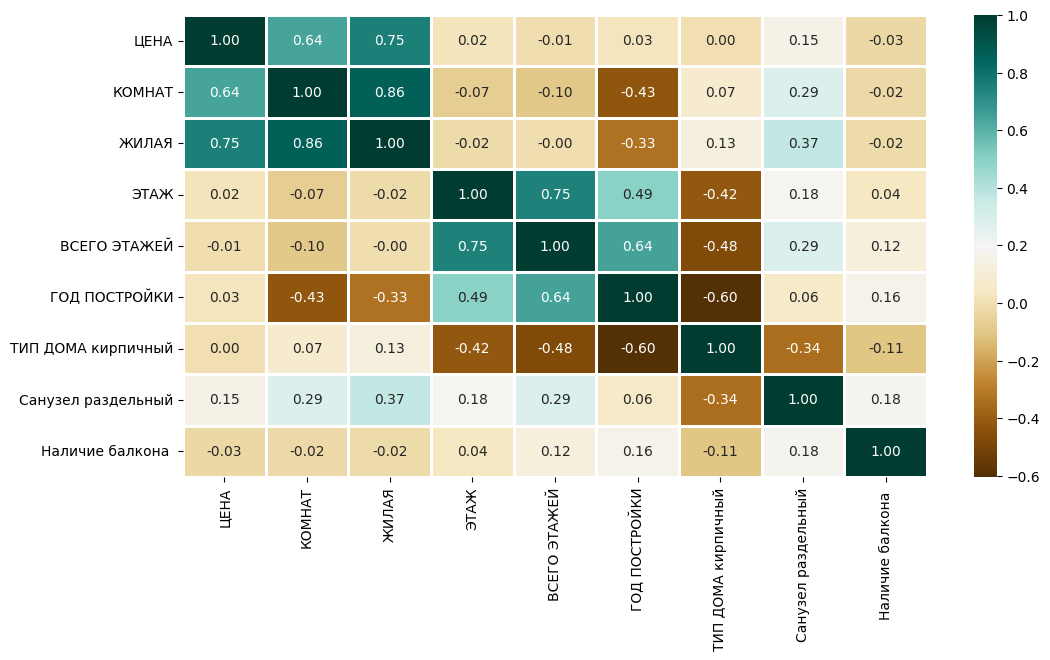

In [2974]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [2916]:
table_cols = ['АДРЕС', 'ПРОДАВЕЦ', 'ЦЕНА', 'КОМНАТ', 'ПЛОЩАДЬ', 'КУХНЯ', 'ЖИЛАЯ', 'ЭТАЖ', 'ВСЕГО ЭТАЖЕЙ', 'БАЛКОН', 'ВЫСОТА', 'САНУЗЕЛ', 'ОКНА', 'РЕМОНТ', 'МЕБЕЛЬ', 'ПРОДАЖА', 'ТИП СДЕЛКИ', 'ТИП ДОМА', 'ГОД ПОСТРОЙКИ']


array([[<Axes: title={'center': 'ЦЕНА'}>,
        <Axes: title={'center': 'КОМНАТ'}>,
        <Axes: title={'center': 'ПЛОЩАДЬ'}>],
       [<Axes: title={'center': 'КУХНЯ'}>,
        <Axes: title={'center': 'ЖИЛАЯ'}>,
        <Axes: title={'center': 'ЭТАЖ'}>],
       [<Axes: title={'center': 'ВСЕГО ЭТАЖЕЙ'}>,
        <Axes: title={'center': 'ГОД ПОСТРОЙКИ'}>, <Axes: >]],
      dtype=object)

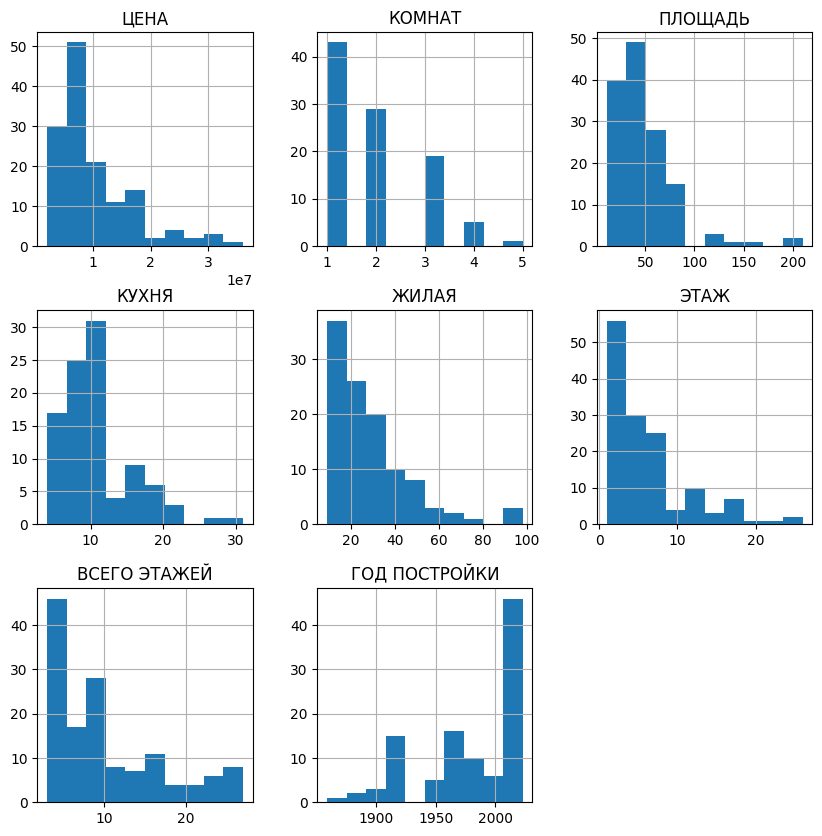

In [2917]:
df[table_cols].hist(figsize=(10,10))

In [2923]:
df['ТИП ДОМА кирпичный'] = df['ТИП ДОМА'].apply(lambda x: 1 if x in ['кирпичный'] else 0)

# Выведите результат
print(df[['ТИП ДОМА', 'ТИП ДОМА кирпичный']])

                ТИП ДОМА  ТИП ДОМА кирпичный
0              кирпичный                   1
1              панельный                   0
2              кирпичный                   1
3              панельный                   0
4              панельный                   0
..                   ...                 ...
134           монолитный                   0
135            кирпичный                   1
136  монолитно-кирпичный                   0
137            панельный                   0
138           монолитный                   0

[139 rows x 2 columns]


In [2924]:
df['Санузел раздельный'] = df['САНУЗЕЛ'].apply(lambda x: 1 if x in ['раздельный'] else 0)

# Выведите результат
print(df[['САНУЗЕЛ', 'Санузел раздельный']])

         САНУЗЕЛ  Санузел раздельный
0     раздельный                   1
1     раздельный                   1
2     раздельный                   1
3     раздельный                   1
4     раздельный                   1
..           ...                 ...
134   раздельный                   1
135   раздельный                   1
136  совмещенный                   0
137   раздельный                   1
138  совмещенный                   0

[139 rows x 2 columns]


In [2948]:
df['БАЛКОН есть'] = df['БАЛКОН'].apply(lambda x: 1 if x in ['балкон','лождия'] else 0)

# Выведите результат
print(df[['БАЛКОН', 'БАЛКОН есть']])

     БАЛКОН  БАЛКОН есть
0       NaN            0
1       NaN            0
2    балкон            1
3    лоджия            0
4       NaN            0
..      ...          ...
134     NaN            0
135  балкон            1
136     NaN            0
137     NaN            0
138  лоджия            0

[139 rows x 2 columns]


In [2949]:
df.to_csv("avito-nedvizh-spb_20.10.23.csv", index=False)

In [2950]:
df.head()

,ЦЕНА,КОМНАТ,ЖИЛАЯ,ЭТАЖ,ВСЕГО ЭТАЖЕЙ,БАЛКОН,ВЫСОТА,САНУЗЕЛ,ОКНА,РЕМОНТ,МЕБЕЛЬ,ПРОДАЖА,ТИП СДЕЛКИ,ТИП ДОМА,ГОД ПОСТРОЙКИ,ТИП ДОМА кирпичный,Санузел раздельный,БАЛКОН есть,Наличие балкона
0,5157000,NaN,NaN,6,6,NaN,NaN,раздельный,во двор,требует ремонта,NaN,свободная,возможна ипотека,кирпичный,1909.0,1,1,0,0
1,5500000,1.0,15.0,6,9,NaN,NaN,раздельный,во двор,евро,NaN,свободная,NaN,панельный,NaN,0,1,0,0
2,7500000,2.0,29.0,5,9,балкон,2.5 м,раздельный,"во двор, на солнечную сторону",требует ремонта,"кухня, хранение одежды, спальные места",свободная,возможна ипотека,кирпичный,1984.0,1,1,1,1
3,6500000,1.0,17.0,8,12,лоджия,2.6 м,раздельный,во двор,дизайнерский,NaN,свободная,возможна ипотека,панельный,1977.0,0,1,0,0
4,6000000,1.0,17.0,2,9,NaN,2.6 м,раздельный,во двор,косметический,"кухня, хранение одежды",свободная,возможна ипотека,панельный,1973.0,0,1,0,0


<ipython-input-2951-8b69fd96db0b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

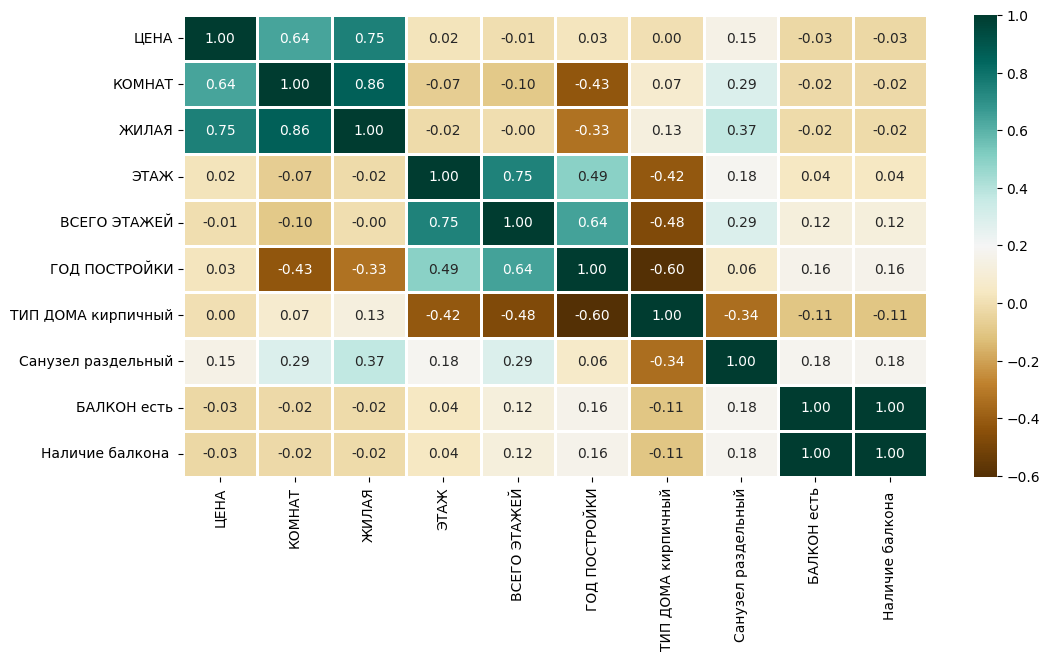

In [2951]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)